In [214]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [215]:
# set datetime index
resampled_data = pd.read_csv("Sprint_Resampled Data.csv")
resampled_data['Date'] = resampled_data['Date'].apply(pd.to_datetime)
resampled_data = resampled_data.set_index('Date')

In [216]:
# handling missing value
test = resampled_data['1991-3': '2019-5'].dropna(axis=1)
train = test[:int(0.95*(len(test)))]
valid = test[int(0.95*(len(test))):]
# resampled_data

# model = VAR(endog=train)
# model_fit = model.fit()
# prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [217]:
model = VAR(endog=test)
model_fit = model.fit()
true = model_fit.forecast(model_fit.y, steps=(len(valid)+3))

prediction = true

/home/yuntong/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [218]:
len(valid)

17

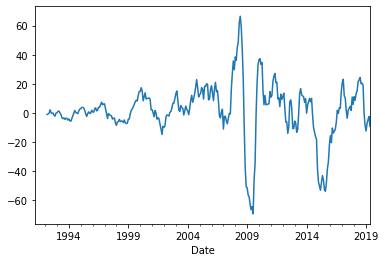

In [219]:
# remove seasonality
test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].diff(12).plot()

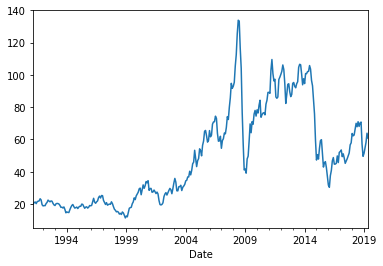

In [220]:
test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].plot()

In [221]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[test.columns])
pred = pred.set_index(pd.date_range("2019-5","2021-1",freq = "M"))

for j in range(0,18):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]
# for i in test.columns:
#     print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

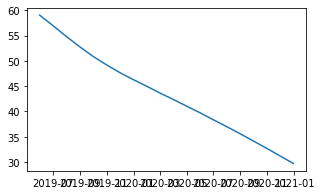

In [222]:
fig, ax = plt.subplots(figsize=(5, 3))
l1 = plt.plot(pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])


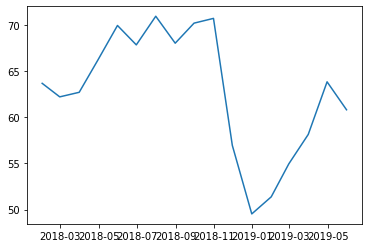

In [223]:
l2 = plt.plot(valid['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])

In [235]:
temp = pred["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]["2020"]
temp

,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"
2020-01-31,44.976
2020-02-29,43.6835
2020-03-31,42.3944
2020-04-30,41.0907
2020-05-31,39.7628
2020-06-30,38.407
2020-07-31,37.0229
2020-08-31,35.6116
2020-09-30,34.1746
2020-10-31,32.7125


In [237]:
np.mean(temp)

Cushing, OK WTI Spot Price FOB (Dollars per Barrel)    37.564701
dtype: float64

/home/yuntong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Remove the CWD from sys.path while we load stuff.


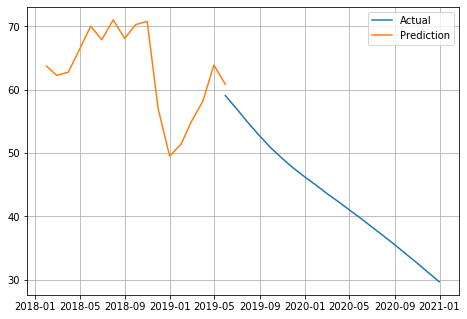

In [239]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], label="Prediction")
ax.plot(valid['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], label="Prediction")

plt.legend()
plt.grid()
plt.tight_layout()

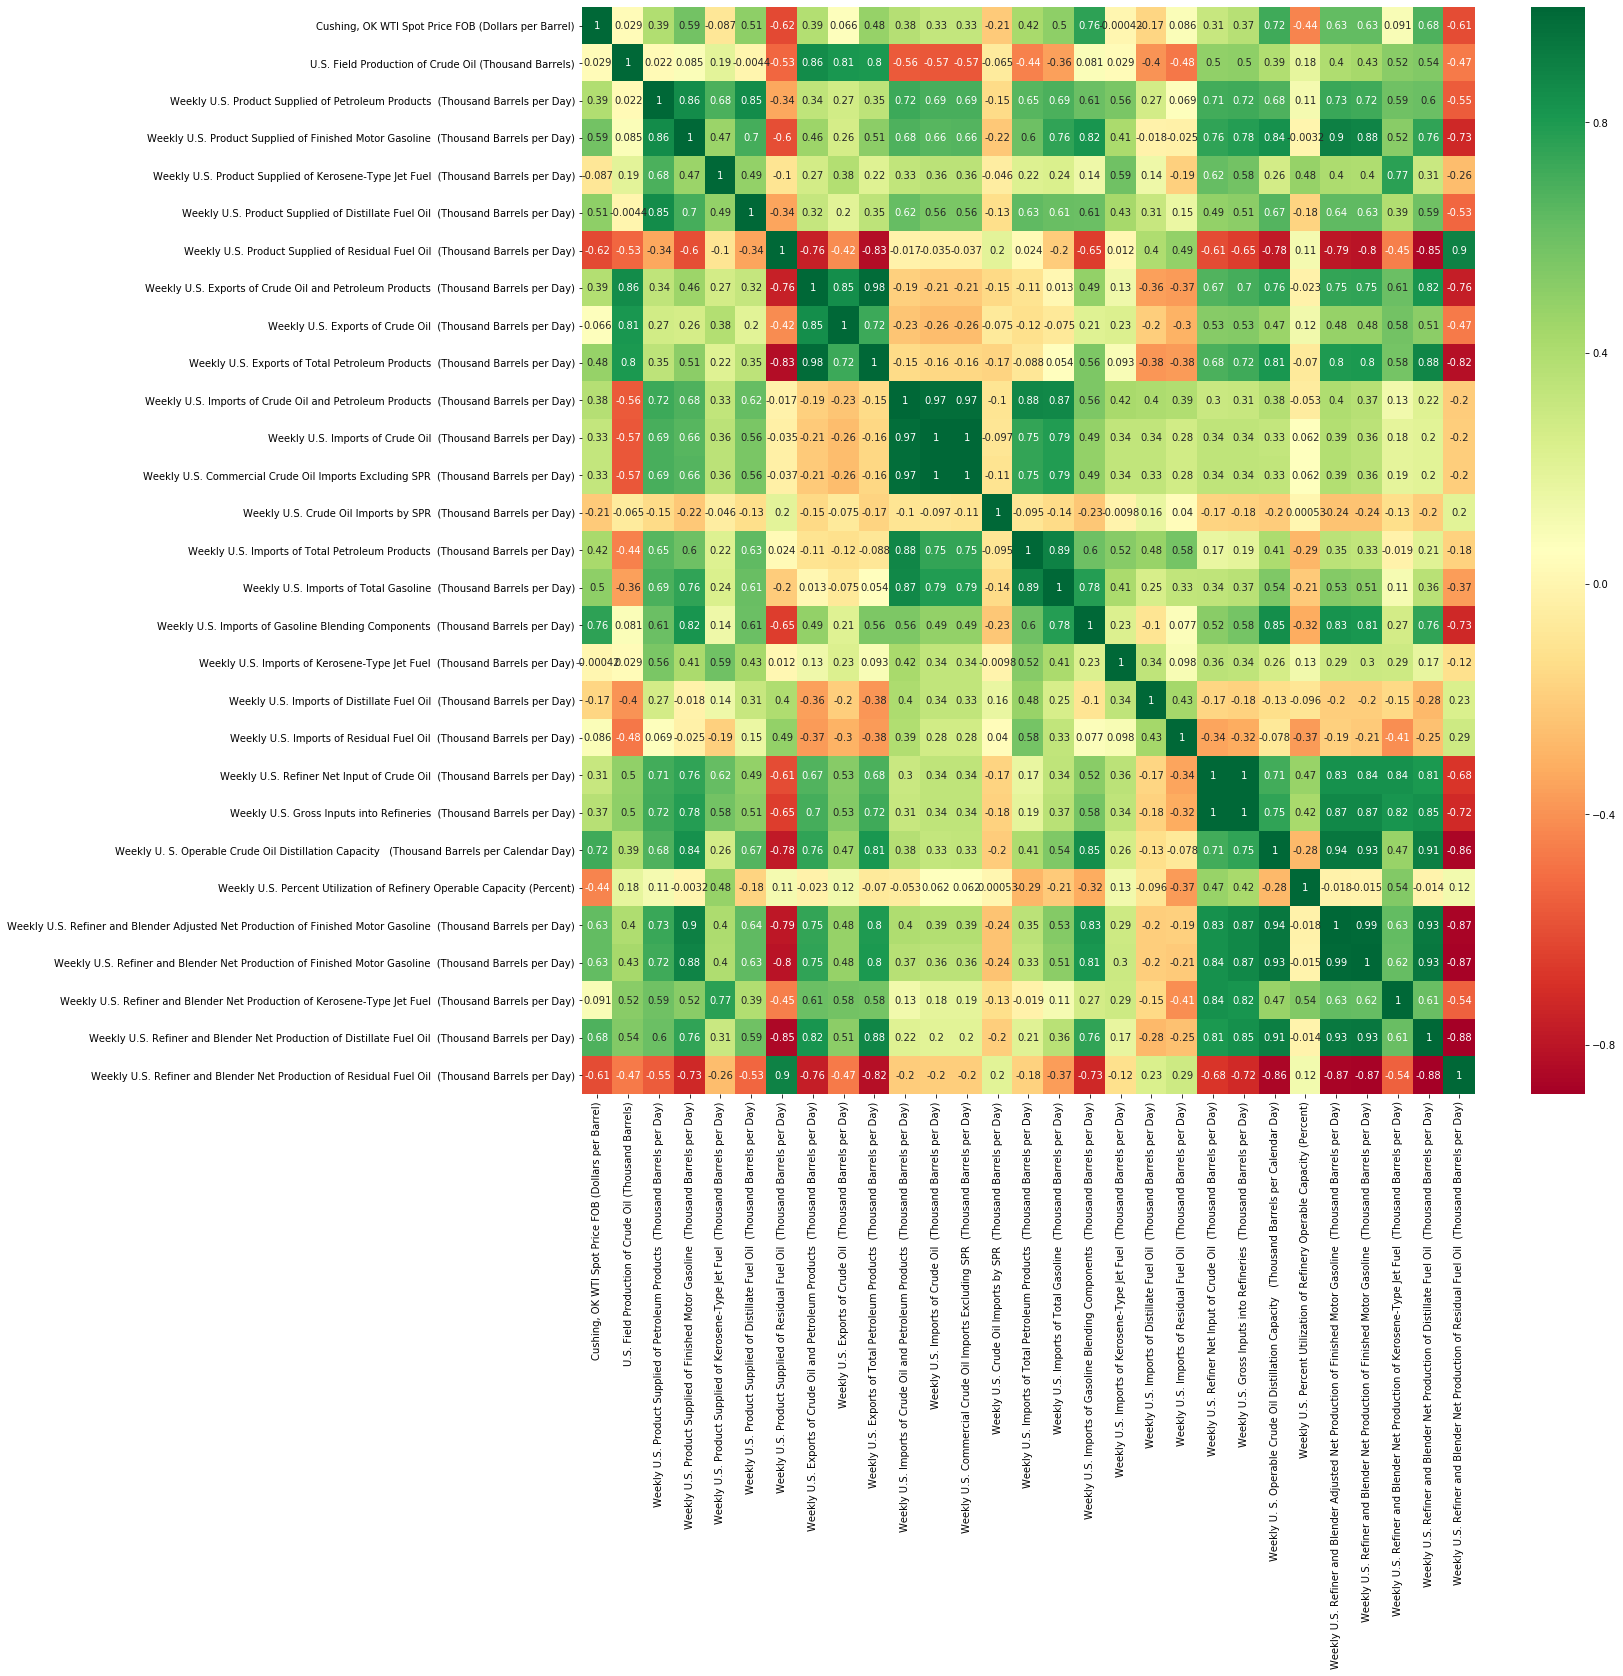

In [181]:
# feature selection 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns


model = ExtraTreesClassifier()
X = test.iloc[:,1:28]
y = test.iloc[:,0]

corrmat = test.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(test[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [161]:
test.shape

(339, 29)

In [241]:
# choosing parameters based on their corr
matrix = test[top_corr_features].corr()

threshold = 0.7
chosen = matrix["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"][np.absolute(matrix["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"])> threshold]
chosenCol = chosen.index
chosen

Cushing, OK WTI Spot Price FOB (Dollars per Barrel)                                            1.000000
Weekly U.S. Imports of Gasoline Blending Components  (Thousand Barrels per Day)                0.759827
Weekly U. S. Operable Crude Oil Distillation Capacity   (Thousand Barrels per Calendar Day)    0.715360
Name: Cushing, OK WTI Spot Price FOB (Dollars per Barrel), dtype: float64

In [242]:
test = test[chosenCol]
test = resampled_data['1991-3': '2019-5'].dropna(axis=1)
train = test[:int(0.95*(len(test)))]
valid = test[int(0.95*(len(test))):]

model = VAR(endog=train)
model_fit = model.fit()

prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/home/yuntong/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [243]:
valid.index

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [244]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[test.columns])
pred = pred.set_index(valid.index)

for j in range(0,29):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]



In [245]:
pred

,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",U.S. Field Production of Crude Oil (Thousand Barrels),Weekly U.S. Product Supplied of Petroleum Products (Thousand Barrels per Day),Weekly U.S. Product Supplied of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Product Supplied of Kerosene-Type Jet Fuel (Thousand Barrels per Day),Weekly U.S. Product Supplied of Distillate Fuel Oil (Thousand Barrels per Day),Weekly U.S. Product Supplied of Residual Fuel Oil (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day),...,Weekly U.S. Imports of Residual Fuel Oil (Thousand Barrels per Day),Weekly U.S. Refiner Net Input of Crude Oil (Thousand Barrels per Day),Weekly U.S. Gross Inputs into Refineries (Thousand Barrels per Day),Weekly U. S. Operable Crude Oil Distillation Capacity (Thousand Barrels per Calendar Day),Weekly U.S. Percent Utilization of Refinery Operable Capacity (Percent),Weekly U.S. Refiner and Blender Adjusted Net Production of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Kerosene-Type Jet Fuel (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Distillate Fuel Oil (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Residual Fuel Oil (Thousand Barrels per Day)
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,53.4528,317204,20868.7,9218.77,1825.68,4216.15,388.478,6454.18,1317.88,5133.31,...,188.304,16821.9,17091.7,18483.4,92.2969,9941.78,9983.91,1776.3,5264.03,409.676
2018-02-28,50.2295,320056,20792.5,9156.62,1820.93,4276.52,370.989,6476.2,1269.1,5203.55,...,200.345,16714.6,16975.2,18468.2,91.7245,9910.26,9939.99,1774.23,5238.57,414.426
2018-03-31,47.8591,322953,20692.8,9130.14,1813.32,4270.19,373.844,6510.85,1241.35,5265.54,...,199.341,16701.4,16958.4,18463.5,91.6698,9898.11,9927.64,1772.31,5243.37,414.048
2018-04-30,45.9648,325721,20597.8,9118.01,1806.02,4243.69,365.215,6548.4,1224.04,5320.1,...,195.093,16729.4,16983.1,18464.6,91.825,9896.31,9932.54,1769.93,5250.38,412.061
2018-05-31,44.3767,328388,20531.8,9124.59,1800.29,4210.29,354.041,6584.24,1213.02,5366.74,...,188.745,16782.1,17032.1,18469.6,92.102,9910.75,9955.76,1768.86,5261.17,409.561
2018-06-30,43.0003,330972,20488.5,9139.66,1796.74,4177.04,341.699,6617.76,1206.04,5407.12,...,181.723,16845,17091.1,18476.9,92.4249,9934.07,9988.56,1769.67,5273.75,406.841
2018-07-31,41.771,333462,20461.8,9156.54,1795.22,4147.5,329.679,6649.95,1202.06,5443.26,...,174.783,16908.3,17150.5,18485.6,92.7402,9960.24,10024.1,1772.15,5286.69,403.971
2018-08-31,40.6433,335849,20446.1,9171.22,1795.29,4123.22,318.65,6682,1200.49,5476.93,...,168.33,16966.1,17204.4,18495.3,93.0153,9985.18,10057.8,1775.75,5298.8,401.008
2018-09-30,39.5868,338129,20437,9182.13,1796.43,4104.38,308.871,6714.82,1200.96,5509.38,...,162.495,17015.7,17250.5,18505.7,93.2377,10006.9,10087.5,1779.89,5309.47,398.022


/home/yuntong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # This is added back by InteractiveShellApp.init_path()


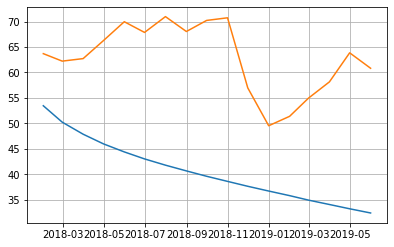

In [246]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.plot(pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])
plt.plot(test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])


ax = fig.add_axes([0,0,1,1])

ax.plot(pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], label="")
ax.plot(valid['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], label="x**3")
plt.grid()
plt.tight_layout()
df = pd.DataFrame()

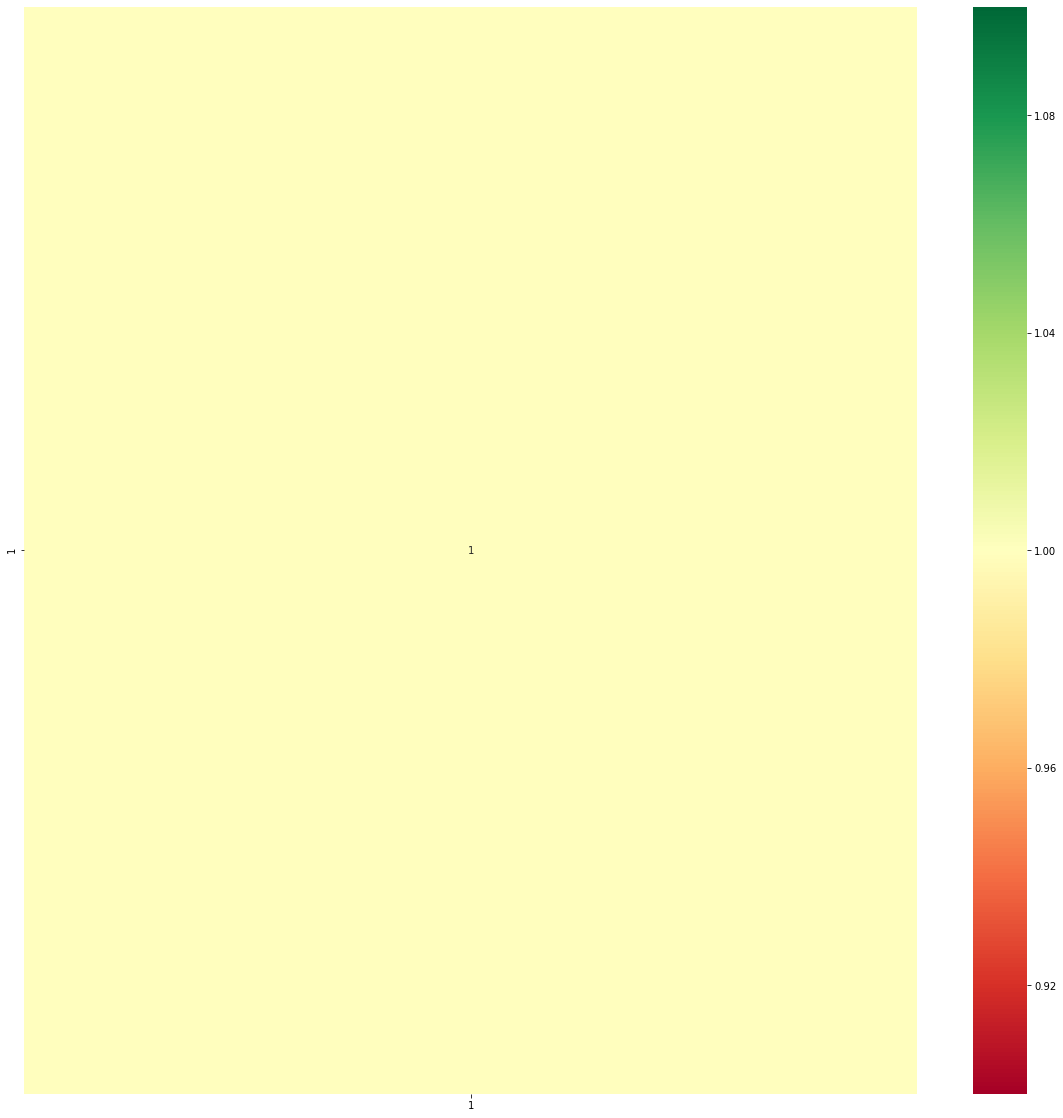

In [132]:
a = pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']

b = valid['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']
df = pd.concat([a,b], axis=1, ignore_index=True)
df.reset_index(inplace=True)
df.drop("Date",axis = 1, inplace = True)
df.corr()

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [133]:
# # detrend and remove seasonality 
# from sta,tsmodels.tsa.seasonal import seasonal_decompose
# series = test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']
# result = seasonal_decompose(series, model='additive')
# result.plot()
# plt.show()

In [134]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# fig, ax = plt.subplots(2, figsize=(12,6))
# ax[0] = plot_acf(result.Residual, ax=ax[0], lags=20)
# ax[1] = plot_pacf(series, ax=ax[1], lags=20)

In [109]:
# for col in chosenCol:
#     result = seasonal_decompose(test[col],model = 'additive')
#     result.plot()

In [67]:
# # VARMAX example
# from statsmodels.tsa.statespace.varmax import VARMAX
# from random import random
# # contrived dataset with dependency
# vary = train.iloc[:,0]
# varx = train.iloc[:,1:]
# # fit model
# model = VARMAX(endog=vary, order=(1, 0))
# model_fit = model.fit(disp=False)
# # make prediction
# data_exog2 = [[100]]
# yhat = model_fit.forecast(ex='Cushing, OK WTI Spot Price FOB (Dollars per Barrel)')
# print(yhat)

In [68]:

# # HWES example
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# # contrived dataset

# # fit model
# # model = ExponentialSmoothing(test)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(len(valid), len(valid))
# print(yhat)

In [69]:

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# X = test.iloc[:,1:10]
# y = test.iloc[:,0]
# #apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=4)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(10,'Score'))  #print 10 best features

In [70]:
# from sklearn.ensemble import RandomForestClassifier
# X = test.iloc[:,1:28]
# y = test.iloc[:,0]
# clf = RandomForestClassifier()
# clf.fit(X, y)
# importance = pd.Series(clf.feature_importances_)
# importance.sort_values(ascending=False)
# print(importance)